# Sistemas Inteligentes

## Grado en Ingeniería Informática
## Universidad de Burgos
## José Francisco  Diez
## Curso 2018-2019
# Autores:
- **Rodrigo Díaz García**
- **Miguel Barriuso García**

In [2]:
%matplotlib inline 
#para dibujar en el propio notebook
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib como plot


# Reconocimiento de formas

En esta práctica se va a hacer un programa muy sencillo de reconocimiento de formas. 
Se utilizará el perceptron realizado por el alumno. De manera optativa se podrá entrenar el perceptron con un algoritmo genético.

El proceso consistirá en:
- obtener un conjunto de datos X,y
    - X será un conjunto de atributos que describa cada imagen, los valores de los pixels, en su forma más sencilla
    - y será la clase
- Dividir el conjunto de datos en dos partes: conjunto de entrenamiento y conjunto de test.
- Entrenar una red neuronal con una parte de los datos (conjunto de entrenamiento)
    - Esta parte se hará con la red neuronal de Sklearn y también con la nuestra
- Comprobar su funcionamiento con otra parte (conjunto de test) para saca la tasa de acierto.
    - Esta parte se hará con la red neuronal de Sklearn y también con la nuestra




El enfoque usado es muy sencillo por lo que solo puede funcionar con problemas sencillos (pocas clases, poca variabilidad en las imágenes ...). En casos reales no vale con entrenar un modelo directamente con los valores de los pixels.

Las imágenes con las que se va a trabajar pertenecen al repositorio MPEG7, obtenido de www.dabi.temple.edu/~shape/MPEG7/dataset.html, en la versión de ubuvirtual se han quitado algunas imágenes para simplificar el problema.

Lo primero que se debe hacer es descomprimir las imágenes en la carpeta **MPEG7dataset**.

```Python
'''
Tarea 1: Descargar y descomprimir las imágenes en la carpeta MPEG7dataset.
La carpeta MPEG7dataset estará en la misma carpeta que el notebook actual.
'''

```
----------------------------------------




Cada imagen contiene en su nombre el nombre de la clase a la que pertenece. Se puede obtener el nombre de todos los ficheros de un directorio con **listdir** del modulo **os**

In [3]:
'''
Ejemplo 1
Obtengo los nombres de todos los ficheros y devuelvo para 
para que se muestren los 10 primeros
'''
import os

img_names = os.listdir("MPEG7dataset")
img_names[:10] # solo devuelve los 10 primeros

['apple-1.gif',
 'apple-10.gif',
 'apple-11.gif',
 'apple-12.gif',
 'apple-13.gif',
 'apple-14.gif',
 'apple-15.gif',
 'apple-16.gif',
 'apple-17.gif',
 'apple-18.gif']

In [4]:
'''
Ejemplo 2
obtengo la clase a la que pertenece una imagen.
El nombre de la clase es la primera parte del nombre.
'''
img_names[0].split("-")

['apple', '1.gif']

## Skimage

La librería Skimage o Scikit-Image es una librería de Python construida sobre Numpy que tiene algoritmos de tratamiento de imágenes: operaciones con color, transformaciones, filtros, segmentación etc

Se puede cargar una imagen simplemente con el método **imread** y se puede mostrar con el método **imshow**, ambos métodos del módulo **skimage.io**

In [5]:
'''
Ejemplo 3.1
Obtiene img a partir de su ruta en el disco.
'''
from skimage.io import imshow, imread
# os.sep es el separador del sistema operativo (/ (linux) o \ (windows))
img = imread("MPEG7dataset"+os.sep+img_names[0])

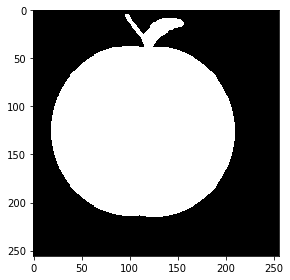

In [6]:
'''
Ejemplo 3.2
Se muestra la imagen
'''
imshow(img)

In [7]:
'''
En skimage las imágenes son arrays de numpy, un tipo de objeto
similar a las listas, pero más eficiente y con muchas operaciones
especiales.
'''
print(img.shape)
img

(256, 256)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
img.size # alto x ancho (el número total de pixels)

65536

In [9]:
'''
Ejemplo 4

Se cambia la forma, pasa de tener los valores en 2 dimensiones a tenerlo en 1.

[[p00,p01],
 [p10,p11]]  => [p00,p01,p10,p11]

'''
# se pasa a una sola fila y se convierte en lista (se aplana la imagen)
lista_pixels = img.reshape(img.size).tolist()

# muestro los primeros
lista_pixels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Redimensionar una imágen

Se puede redimensionar una imagen usando el método **resize** del módulo **skimage.transform**.

En el ejemplo de abajo se redimensiona y se muestra.

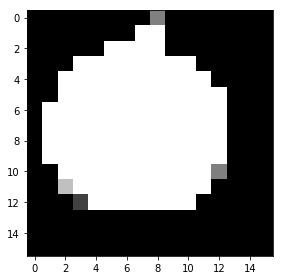

In [10]:
'''
Ejemplo 5
Redimensiona una imagen a 16 x 16
'''

from skimage.transform import resize
import warnings

'''
el metodo resize lanza un warning, 
El método filterwarnings permite ignorar el warning y que no se muestre en pantalla.
''' 
warnings.filterwarnings("ignore")

img_mini =  resize(img, (16, 16))
imshow(img_mini)

## Obtenención del conjunto de datos

Para entrenar una red neuronal o cualquier otro clasificador se necesita un conjunto de datos.

El conjunto de datos estará formado por X e y. 

- X será un array 2D con tantas filas como imágenes y tantas columnas como atributos se usen para describir cada imagen, en este caso los atributos serán simplemente los valores de los pixels.
- y será un array de una sola dimensión, con tantos elementos como imágenes, sus valores serán los nombres de las clases de cada imagen.

Ejemplo inventado.
Los valores de los atributos van entre 0 y 1. 0 si el color del pixel era negro, 1 si era blanco.

|$X_0$|$X_1$|...|$X_n$|$y$|
|:---:|:---:|:---:|:---:|:---:|
|0.1|0.3|0.7|0.8|avion|
|0.2|0.1|0.3|0.7|avion|
|0.9|0.6|0.1|0.3|coche|
|0.3|0.3|0.1|0|coche|
|0.7|0.1|0.4|0.7|arbol|
|0.1|0.3|0.2|0.8|arbol|



# Tarea

## **Tarea a completar por el alumno:**
- Hacer una función *get_dataset()* que devuelve X e y. Dicha función se basará en el ejemplo 6 y hará uso de los códigos vistos en los ejemplos 1-5.

In [11]:
'''
Tarea 2

Recorre todos los ficheros y construye el conjunto de datos X,y
    - saca el nombre de clase
    - saca la imagen, redimensiona, aplana
    
Haz uso de los ejemplos 1, 2, 3, 4 y 5
'''
import warnings
warnings.filterwarnings("ignore")


lista_X = []
lista_y = []
for name in img_names:
    img = resize(imread("MPEG7dataset" + os.sep + name), (16, 16))
    lista_X.append(img.reshape(img.size).tolist())
    lista_y.append(name.split("-")[0])
    
X = np.array(lista_X)
y = np.array(lista_y)

# se muestra el tamaño de X e y solo para checkear que no esté vacío.
print(X.shape,y.shape)
    

(1399, 256) (1399,)


-----------

-----------

-----------

-----------

## Construcción y evaluación del clasificador de formas.

En python tenemos una librería de minería de datos llamada **Scikit-learn** o **Sklearn**. También viene incluida en Anaconda. Esta librería permite entrenar muchos tips de clasificadores, entre ellos la **red neuronal** vista en teoría.

Como solo tenemos un conjunto de imágenes solo tenemos un conjunto de datos. Si queremos comprobar de manera justa el comportamiento del clasificador tenemos que descomponer el conjunto de datos en entrenamiento y test.

En este trabajo el 70% será para entrenamiento y el 30% para test.

El método **train_test_split** del módulo **sklearn.model_selection** permite dividir un conjunto de datos en dos partes, una para entrenar el clasificador y otra para evaluar su funcionamiento.

Uso estratificación: la misma proporción de clases en entrenamiento que en test.

In [12]:
'''
Ejemplo 7

Solo funciona si hemos completado y ejecutado la tarea 2.
'''

from sklearn.model_selection import train_test_split

'''
El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = 0.7 )


En **Sklearn** todos los clasificadores tienen el mismo funcionamiento. 
Se crea, si no indicamos ningún argumento se crea el clasificador con todos los parámetros por defecto. Y luego:
- el método **fit** entrena el clasificador
- el método **predict** recibe uno o varios ejemplos y nos devuelve las clases que estima el clasificador.

In [13]:
'''
Ejemplo 8
Entrenar un clasificador con el conjunto de entrenamiento
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier


classifier = MLPClassifier()

classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
'''
Ejemplo 9

Testear un clasificador con el conjunto de test

y_pred son las clases que estima el clasificador, si las comparasemos
con las clases reales y_test podríamos saber cuanto acierta el clasificador.
'''
y_pred = classifier.predict(X_test)
y_pred[:10] # muestra las 10 primeras

array(['watch', 'bat', 'bat', 'spring', 'bat', 'device9', 'watch',
       'apple', 'cellular_phone', 'Heart'], dtype='<U14')

## **Tarea a completar por el alumno:**

**Sklearn** tiene métodos para evaluar un clasificador en términos de porcentaje de acierto y otras medidas, pero no las vamos a usar.

Se pide una función que compare *y_pred* con *y_test* y devuelva el porcentaje de acierto.

In [19]:
'''
Tarea 3

Realiza una función evalua que 
si le pasan las clases reales y_test y las predicciones y_pred devuelve la tasa de acierto
'''

def evalua(y_test, y_pred):
    return sum(1 for i in range(len(y_test)) if y_test[i] == y_pred[i]) / len(y_test)

evalua(y_test, y_pred) # Una vez implementado debe devolver un valor en torno a 0.8

0.8214285714285714

# Adaptaciones para nuestro perceptron

El perceptron que hemos programado solo puede clasificar 2 clases a la vez (para clasificar N clases se necesitan N perceptrones)

Además nuestra implementación espera que las clases sean 0s o 1s, no nombres.

**Solución**: selección con máscara booleana.

In [20]:
'''
Ejemplo 10

Uso de la máscara booleana 
- Seleccionar solo los datos que cumplan un criterio
- convertir un array de algún tipo en un array de 0s y 1s, con 1s donde se cumple el criterio

'''

a = np.array([1,2,3,4,5,6])
mascara = a < 4

print(mascara)
print(a[mascara])

# astype cambia al tipo que se quiera
print(mascara.astype(int)) # los True se convierten en 1s los False en 0s


[ True  True  True False False False]
[1 2 3]
[1 1 1 0 0 0]


In [21]:
'''
Ejemplo 10.1

La misma idea pero seleccionando solo los casos en los que la clase sea pájaro o árbol

X_2C de todos los ejemplos de X solo se seleccionan aquellos donde la clase es pájaro o árbol
y_2C de todos los ejemplos de y solo se seleccionan aquellos donde la clase es pájaro o árbol
'''


X_2C = X[((y == 'bird') | (y == 'tree'))]
y_2C = y[((y == 'bird') | (y == 'tree'))]

In [22]:
# Tenemos solo dos clases, pero siguen siendo cadenas de texto
y_2C

array(['bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird',
       'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird',
       'bird', 'bird', 'bird', 'bird', 'tree', 'tree', 'tree', 'tree',
       'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree',
       'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree'],
      dtype='<U14')

In [23]:
# Se convierte a 0s y 1s
# Recuerda que el True se evalua como 1.
y_2C_num = (y_2C == 'bird').astype(int)
y_2C_num

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.linear_model import Perceptron

X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7 )

# Entrenando el perceptron de Sklearn
clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False)
clf.fit(X2C_train, y2C_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=False,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None,
      random_state=None, shuffle=False, tol=None, verbose=0,
      warm_start=False)

In [25]:
y_pred_2C = clf.predict(X2C_test)

evalua(y2C_test, y_pred_2C)

0.8333333333333334

# Usar el perceptron propio 

Habíamos visto que el perceptrón de sklearn tiene un método **fit** que entrena el clasificador.
Nosotros tenemos un método **perceptron_train** que entrena el perceptron y devuelve los pesos.

Trae a esta parte el código del perceptron y ejecutalo para obtener los pesos.

In [26]:
'''
Reemplaza la función por la tuya completa del otro notebook
'''
def entrena_perceptron(X, y, z, eta, t):    
    # inicialización de los pesos
    
    
    w = np.zeros(len(X[0]))       
    n = 0                           # numero de iteraciones se inicializa a 0                     
    
    # Inicialización de variables adicionales 
    ypred = np.zeros(len(y))     # array para las predicciones de cada ejemplo
    errors = np.zeros(len(y))       # array para los errores (valor real - predicción)
    J = []                          # error total del modelo     
    
    
    while n < t:  
        ############## a completar (desde aqui) #################
        # para cada ejemplo x del conjunto de datos X
        #        Calcular el sumatorio de las entradas por los pesos (np.dot) 
        #        Se hace pasar el valor resultante por la función de activación 
        #        Para cada peso
        #              actualizar peso
        #######################################################
        for i in range(len(X)):
            ypred[i] = 1 if np.dot(X[i], w) > z else 0
            for j in range(len(w)):
                w[j] += eta * (y[i] - ypred[i]) * X[i][j]
        ############## a completar (hasta aqui) #################
        n += 1 # se incrementa el número de iteraciones 

        
        
        # calculo del error cuadrático del modelo
        # esto no es más que la suma de cuadrados entre el valor real y la predicción
        for i in range(0,len(y)):     
            errors[i] = (y[i]-ypred[i])**2
        J.append(0.5*np.sum(errors))
           
    # Devuelve los pesos y el error cuadrático
    return w, J


z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t)


print("Los pesos son:")
print(weights)

print("La suma de errores cuadráticos es:")
print(errors)

Los pesos son:
[ 0.          0.          0.09803922  0.19803922  0.1         0.
  0.2         0.2        -0.1         0.          0.          0.
  0.          0.1         0.1         0.          0.          0.09803922
  0.19803922  0.19803922  0.1         0.1        -0.05       -0.1
  0.225      -0.1        -0.05        0.          0.1         0.1
  0.034375    0.1         0.07352941  0.09803922  0.09803922  0.19803922
  0.1        -0.19607843 -0.39607843 -0.2        -0.1        -0.1
  0.          0.1         0.2         0.2         0.2         0.0140625
  0.          0.          0.09803922  0.19803922  0.14803922 -0.29803922
  0.00196078 -0.10196078 -0.30196078 -0.00196078  0.          0.
  0.1         0.2         0.1         0.          0.          0.
 -0.00196078  0.17303922 -0.29803922 -0.04803922 -0.09803922 -0.29803922
 -0.35196078 -0.29766391 -0.10196078  0.09803922  0.19803922  0.29803922
  0.09803922  0.          0.          0.09803922  0.09803922  0.19803922
  0.29803922 -0.0

El perceptron de sklearn también tiene un método **predict** que pasadas unos ejemplos predice de que clase son.

Nos hace falta una función similar. La vamos a llamar **predice_varios** y se va a basar en el ejemplo siguiente que predice la clase de un caso $x$.

In [27]:
'''
Ejemplo 11.

Función para hacer la predicción de un caso x
'''

def predice(w,x):
    f = np.dot(x, w)             
                       
    # función de activación
    y_pred = 1 if f > z else 0
    
    return y_pred

# Se predice el primer caso del conjunto de datos (que no haga bien un ejemplo no significa que no está bien)
# la implementación de sklearn solo tiene un 80% de acierto
print("Valor real ", y2C_test[0])
print("Valor predicho ",predice(weights,X2C_test[0]))

Valor real  0
Valor predicho  0


In [28]:
'''
Tarea 4

Utilizando el ejemplo anterior. 

Evalua la tasa de acierto de tu perceptron.
'''
def predice_varios(w,X):
    preds = []
    for x in X:
        preds.append(predice(w, x))
    return np.array(preds)




y_pred_2C = predice_varios(weights,X2C_test)

evalua(y2C_test, y_pred_2C) # devuelve un valor en torno a 0.8


0.8333333333333334

# Parte Opcional

## Entrenar un perceptron con un algoritmo genético

En el algoritmo del perceptron lo que se hace es variar los pesos de acuerdo a una determinada fórmula, llamada descenso del gradiente. Pero los pesos podrian encontrarse de otras maneras, como por ejemplo con un genético.

Para entrenar un perceptron usando un algoritmo genético hay que tener en cuenta lo siguiente:
- El individuo son los pesos. Los pesos optimos en lugar de hallarse con el algoritmo del perceptron se van a hallar mediante el algoritmo genético.
- El individuo es de tipo númerico, con valores comprendidos entre -1 y 1.
- El tamaño del individuo es igual al número de atributos del conjunto de entrenamiento.
- El tipo de problema es maximización (queremos maximizar una tasa de acierto.)
- Se van a usar métodos de mutación y cruce para individuos de tipo numérico (busca cuales son en los apuntes y reutiliza los códigos).

- La clave es la función de fitness.

### Función de Fitness


La función de evaluación o función de fitness va a devolver la tasa de acierto.

Para ello solo puede utilizar los datos de entrenamiento, los mismos que se usaban en el entrenamiento del perceptron.

Se van a tomar los pesos del individuo y se van a usar para predecir la tasa de acierto, usando las funciones anteriores **predice_varios** y **evalua**.



In [29]:

import random

import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import deap
print(deap.__version__)


'''
En la función de evaluación, se devuelve un tupla aunque solo se optimize un valor, por eso
la coma despues del primer valor retornado
'''
def evalFunct(individual):
    return evalua(y2C_test, predice_varios(individual, X2C_test)),


creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Minimiza
creator.create("IndividualArray", np.ndarray, fitness=creator.FitnessMax)

1.2


In [30]:
toolbox = base.Toolbox()

# se registra attr_float como un entero aleatorio entre -1 y 1
# se registra individual como una repetición de attr_float, tantos como atributos, el contenedor es el tipo Individual
# se registra population como una repetición de individual, el contenedor es una lista
toolbox.register("attr_float", random.uniform,-1, 1)
toolbox.register("individual", tools.initRepeat, creator.IndividualArray, toolbox.attr_float, n=len(X2C_train[0]))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [31]:
toolbox.register("evaluate", evalFunct)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


random.seed(64)
# se crea una población inicial de 50
pop = toolbox.population(n=500)  

In [32]:
'''
HallOfFame contiene los N mejores individuos vistos durante todo el proceso
Como el tipo del individuo es personalizado hay que pasarle una función de comparación
'''    
hof = tools.HallOfFame(1, similar=np.array_equal)
    
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
    
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.4, mutpb=0.05, ngen=20, stats=stats, halloffame=hof)
hof[0]

gen	nevals	avg     	std     	min      	max     
0  	500   	0.504833	0.136795	0.0833333	0.916667
1  	208   	0.618667	0.106986	0.25     	0.916667
2  	205   	0.7005  	0.0962189	0.416667 	0.916667
3  	220   	0.7705  	0.0917985	0.25     	1       
4  	244   	0.823833	0.0804934	0.5      	1       
5  	209   	0.863667	0.0790352	0.5      	1       
6  	240   	0.890833	0.0813898	0.5      	1       
7  	203   	0.914   	0.0777717	0.5      	1       
8  	252   	0.9365  	0.0794668	0.5      	1       
9  	218   	0.9715  	0.0630826	0.5      	1       
10 	227   	0.992667	0.0341825	0.666667 	1       
11 	172   	0.994   	0.0344416	0.666667 	1       
12 	227   	0.994667	0.0252631	0.833333 	1       
13 	216   	0.995667	0.0259936	0.666667 	1       
14 	224   	0.994   	0.0314925	0.666667 	1       
15 	207   	0.996   	0.0232283	0.75     	1       
16 	208   	0.992833	0.029179 	0.75     	1       
17 	239   	0.994   	0.0287247	0.666667 	1       
18 	230   	0.994   	0.0267208	0.75     	1       
19 	199   	0.996333	0.0

IndividualArray([-0.48854867,  0.87684464,  0.36631737, -0.16379815,
                  0.7905024 , -0.94501639,  0.94609247,  0.9091989 ,
                  0.96305654, -0.67967161, -0.91021595, -0.34225983,
                 -0.178275  ,  0.79155657, -0.24941116,  0.49703753,
                 -0.05858057, -0.60368805,  0.92586207,  0.99296071,
                 -0.60208674,  0.26750427,  0.49279263, -0.02563462,
                  0.8606165 , -0.01788374, -0.25860279, -0.79749811,
                 -0.92622221, -0.30360993,  0.78181429,  0.44361141,
                  0.6913994 ,  0.86178554, -0.84534817,  0.13602739,
                  0.01412605,  0.55657781, -0.01757961, -0.59815195,
                 -0.73130009, -0.35148447,  0.65242185,  0.47659747,
                 -0.24487926,  0.01288122, -0.22505205, -0.9792449 ,
                 -0.58601477, -0.0842625 ,  0.24958974, -0.9447985 ,
                 -0.42264311,  0.10659312, -0.21507088, -0.35031635,
                  0.51543626, -0.4

In [28]:
'''
Haz pruebas con distintos valores de los parámetros.

'''


pesos_genetico = hof[0]

y_pred_2C = predice_varios(pesos_genetico,X2C_test)

evalua(y2C_test, y_pred_2C)

1.0